<a href="https://colab.research.google.com/github/kerengiftaanbalagan/Nezuware/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/NFLX.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.isnull().sum())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


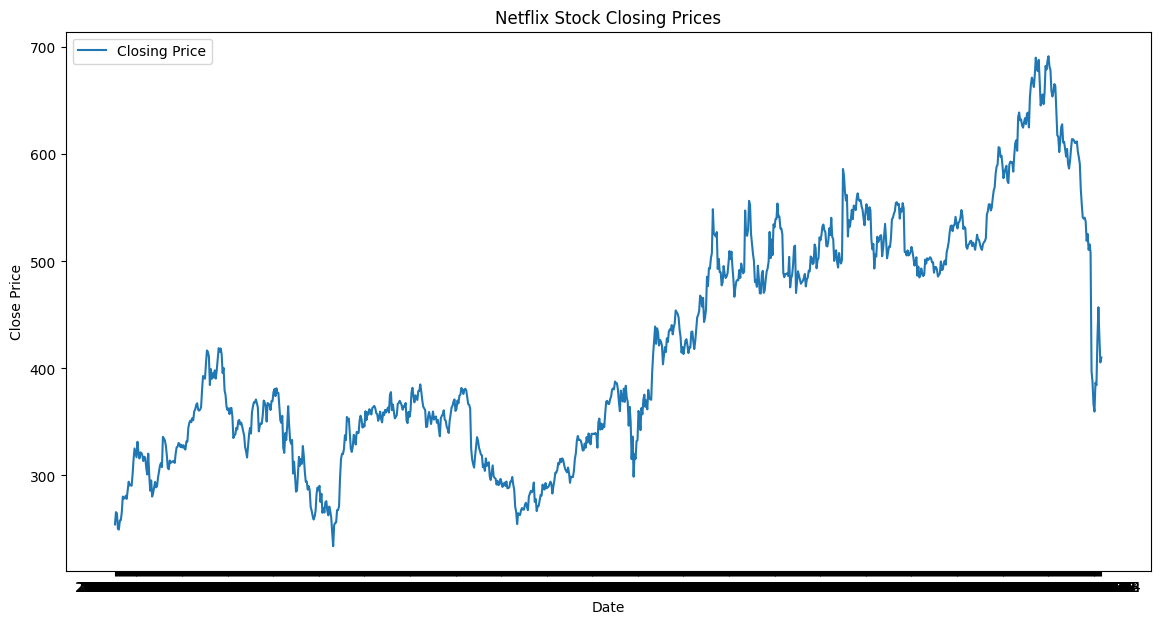

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Netflix Stock Closing Prices')
plt.legend()
plt.show()

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

data = data.sort_values('Date')

data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()

data = data.dropna()

print(data.head())

          Date        Open        High         Low       Close   Adj Close  \
99  2018-06-27  407.559998  411.589996  390.000000  390.390015  390.390015   
100 2018-06-28  395.000000  396.899994  387.100006  395.420013  395.420013   
101 2018-06-29  399.190002  401.329987  390.549988  391.429993  391.429993   
102 2018-07-02  385.450012  398.380005  380.000000  398.179993  398.179993   
103 2018-07-03  399.489990  399.980011  389.500000  390.519989  390.519989   

       Volume      SMA_20      SMA_50     SMA_100  
99   16541400  381.577502  348.768401  322.122701  
100  12219900  383.768503  349.986402  323.534301  
101   9252500  385.343503  351.161002  324.791401  
102   8142500  387.162003  352.569202  326.127601  
103   5280300  388.398003  354.005801  327.531801  


In [4]:
from sklearn.model_selection import train_test_split

X = data[['SMA_20', 'SMA_50', 'SMA_100']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(728, 3) (182, 3) (728,) (182,)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 16.886992943557722
R² Score: 0.9574136606754617


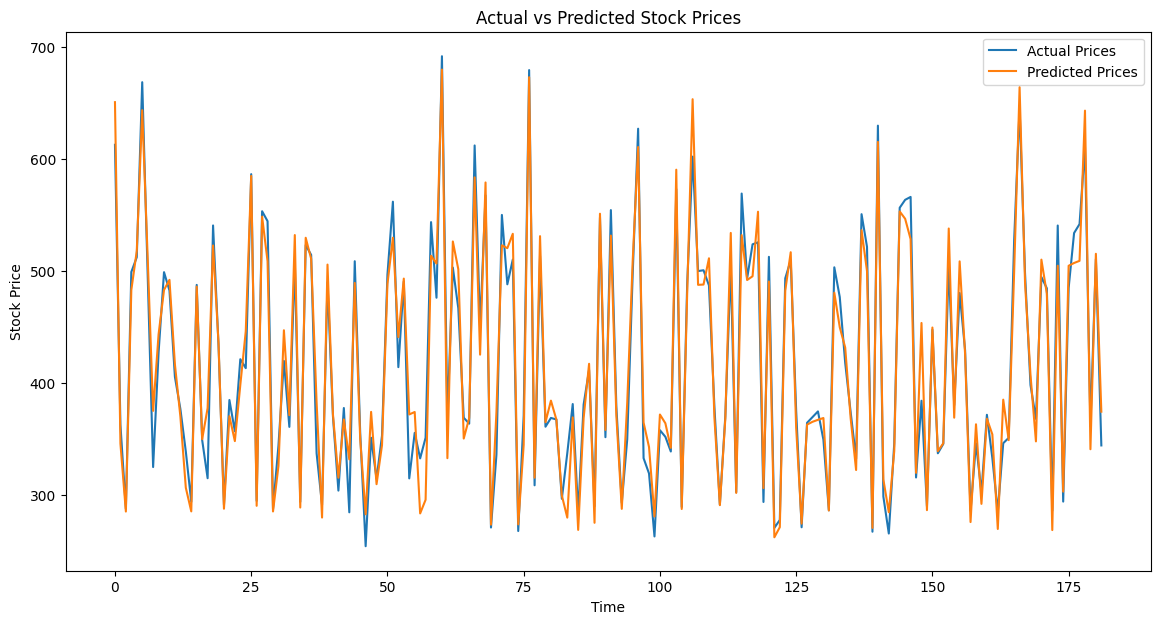

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()